In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

In [3]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n)
Xproj = pca.fit_transform(data1)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_

[ 0.83208595  0.16040299]


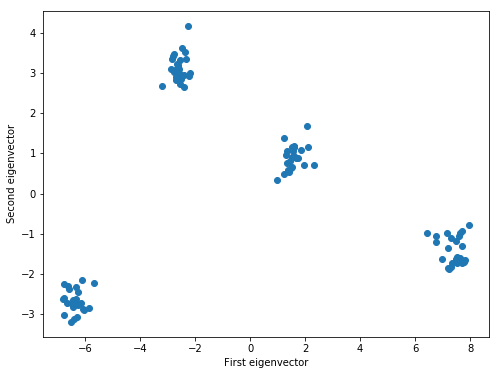

In [4]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1])
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

### From the plot, I guess we chould have 4 clusters. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

In [5]:
#Use package from sklearn.
from sklearn.cluster import KMeans

n=4 # number of clusters
dd=Xproj #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

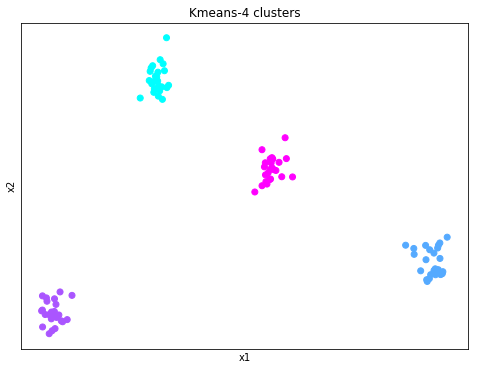

In [6]:
#Plot
plt.figure(figsize=(8,6))
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X=dd
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.595555597621
For n_clusters =3, the average silhouette_score is :0.762249337121
For n_clusters =4, the average silhouette_score is :0.901909648372
For n_clusters =5, the average silhouette_score is :0.782344408352


In [8]:
from scipy.spatial.distance import cdist, pdist

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

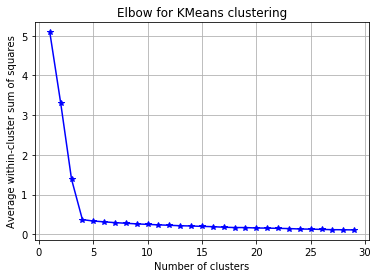

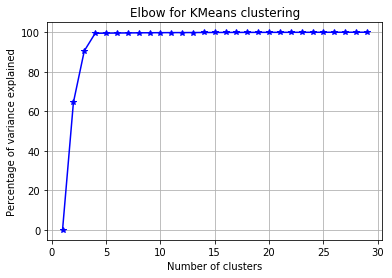

In [9]:
elbow(X, range(1,30))

### Discussion: The average silhouette score close to 1 mean that the points are usually much closer to their cluster centroids than to all the other ones (i.e. clustered appropriately).From the results, we found that when the number of clusters equal to 4, the average silhouette_score is the largest, we should choose k=4.

### The Elbow method looks at the percentage of variance explained as a function of the number of clusters. The idea of the elbow method is to choose the k at which the SSE decreases abruptly. This produces an "elbow effect" in the graph. From the plots, we found that k=4 is the point when the SSE decreases abruptly. Therefore we choose k=4.

### Both methods shows a result consistent with our guess.

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)
Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels.
Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b).

In [10]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)
labels = res1.predict(dd)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

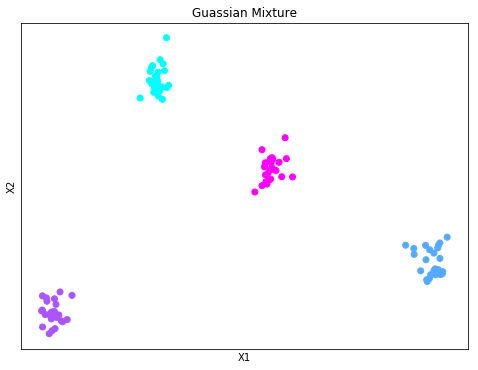

In [11]:
#Plot.
plt.figure(figsize=(8, 6))
plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")
plt.show()

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [12]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.

In [13]:
data2.drop(['DATE', 'TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'LOCATION', u'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'ZIP CODE',
       'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

In [14]:
data2.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
0,0,0,0,0,0,0,0,0,3781862
1,0,0,0,0,0,0,0,0,3781130
2,1,0,1,0,0,0,0,0,3781009
3,0,0,0,0,0,0,0,0,3780501
4,0,0,0,0,0,0,0,0,3780511


In [15]:
for col in range(len(data2.columns)):
    data2.iloc[:, col] = data2.iloc[:, col].astype(int)

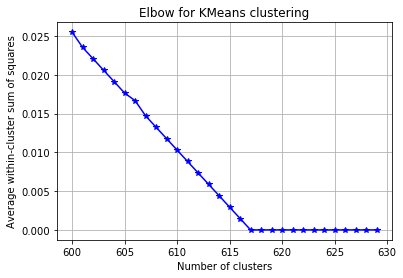

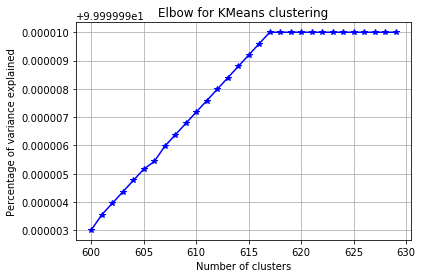

In [16]:
elbow(data2, range(600,630))

### The elbow method is to choose the k at which the SSE decreases abruptly. This produces an "elbow effect" in the graph. From the Elbow method, we choose k=617. There is 617 unique records.

In [17]:
n=617 # number of clusters
dd=data2 #data

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)

[179 384 354 522 458 592 330 584  83 499 237 179  24 479  49 151 148  16
  16 602 533 158  37 299 187 271 157 117  14 338 452 452 239  25  25  50
 181 181 180 145 231 165 190 375   3 115 121 104 116 426 476 225  93 478
 516 100 246 155 182  68 389 325 549  68 308 308 367  26  26 333 337 472
 296 579 373 423 411 337 472 289 322 303 559 485 303 109  40 386 412  48
 451 160 124 357  53  65  48 451 328 259 496  17 259 253 613 307 515  12
  29  82 445 346 424 185 170 482 591 284 220 276 442   4 281 500 334 276
 442 277 130 317 140 142 261 186  45 110 569 317 392 562 287  79 495 102
  35 102 255 589  15 205 374  69 335 335 498 119 538 355  28 201 176 416
 590 200 286 292 581  27 410 282 523 265  34 547 215 305 210 395  76 305
 535 319 526 294 189 167 172 379 532 587 417  43 473 344  57 539 272 232
 462 541 441 455 235 268 433  78  10 235 135 454 531 332 365 125 238 242
 603 173 365 125 238 301   8 576 339 436  23 388 203 491 556 132 241 494
 298 543 266 514 470 414 150 285 577 475 506 573 16

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [18]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
print("original record number is {}".format(len(data2)))

original record number is 680


In [19]:
data2 = data2.drop_duplicates(subset='UNIQUE KEY', keep='first', inplace=False)
print("unique record number is {}".format(len(data2)))

unique record number is 617


## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

### Answer: a,d,f,g

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [20]:
data4 = pd.read_csv('hw4data4.csv')

In [21]:
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

In [22]:
#learn logistic regression over the training sample
logit = LogisticRegression(C=10000)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

In [23]:
n =100

In [24]:
logit.fit(np.c_[data4.x1[:n], data4.x2[:n], data4.x3[:n]], data4.y[:n])

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
logit.intercept_

array([-1.26536347])

In [26]:
logit.coef_

array([[-27.44775857, -73.61158286, -22.62892951]])

#### c) Use your trained model to predict labels for the test data. (3 pts)

In [27]:
#apply to the validation sample
labelPred = logit.predict(np.c_[data4.x1[n:], data4.x2[n:], data4.x3[n:]])
labelActual = data4.y[n:]

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

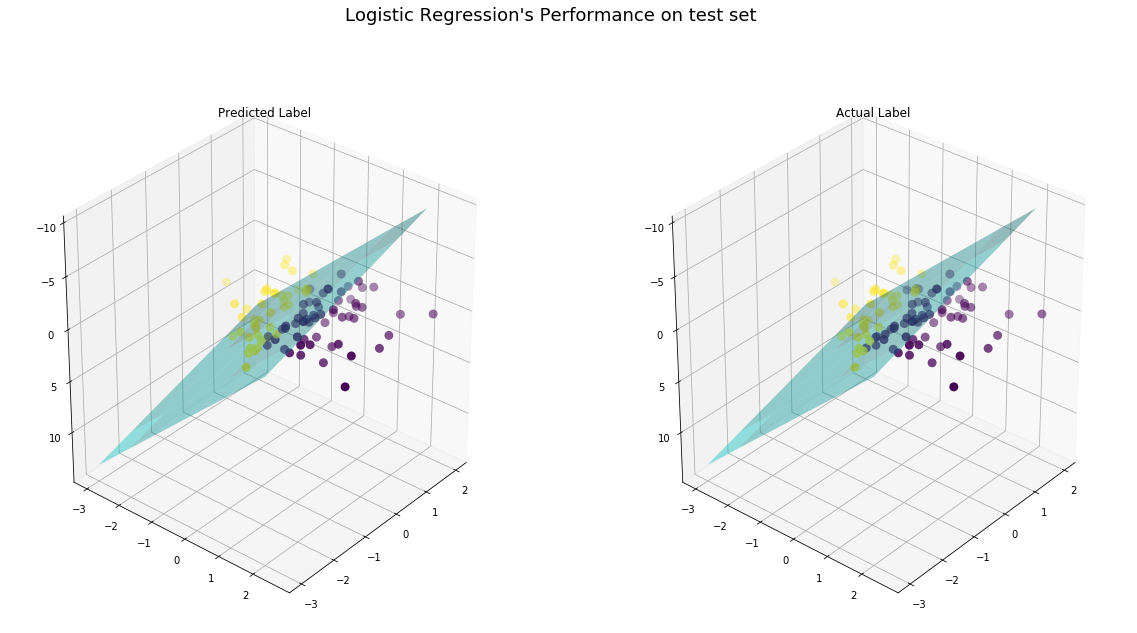

In [28]:
fig = plt.figure(1, figsize=(20, 10))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1 = fig.add_subplot(121, projection='3d', elev=-150, azim=-40)
ax2 = fig.add_subplot(122, projection='3d', elev=-150, azim=-40)

#decision boundary
radius = 3
xplot1, xplot2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot1 + logit.coef_[0][1]*xplot2)/logit.coef_[0][2]
ax1.plot_surface(xplot1, xplot2, yplot, color='c', alpha = 0.4, lw = 2)
ax2.plot_surface(xplot1, xplot2, yplot, color='c', alpha = 0.4, lw = 2)

ax1.set(title='Predicted Label')
ax2.set(title='Actual Label')
ax1.scatter(data4.x1[n:], data4.x2[n:], data4.x3[n:], lw = 0, s = 80, c = labelPred)
ax2.scatter(data4.x1[n:], data4.x2[n:], data4.x3[n:], lw = 0, s = 80, c = labelActual)
plt.show()

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [29]:
from sklearn.metrics import silhouette_score, confusion_matrix
print('confusion matrix\n{}'.format(confusion_matrix(labelPred, labelActual)))
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

confusion matrix
[[58  0]
 [ 5 37]]
Precision = 88.10%
Accuracy = 95.00%
Recall = 100.00%


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

In [31]:
logreg = LogisticRegression(C=1e6)
logreg.fit(X, y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
logreg.intercept_

array([  0.90081544,   7.32067542, -42.43743731])

In [33]:
logreg.coef_

array([[  1.51465313,   4.92248998,  -7.80686047,  -3.81762957],
       [ -0.25238541,  -2.77908786,   1.29890146,  -2.70358404],
       [ -2.46349576,  -6.66224912,   9.39579094,  18.2275616 ]])

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

In [34]:
Z = logreg.predict(X)
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

In [35]:
#compute TP,FP,FN,TN for the above classification
labelActual = y
labelPred = Z
T2 = sum((labelPred==2)&(labelActual==2))
T1 = sum((labelPred==1)&(labelActual==1))
T0 = sum((labelPred==0)&(labelActual==0))
F12 = sum((labelPred==1)&(labelActual==2))
F21 = sum((labelPred==2)&(labelActual==1))
F02 = sum((labelPred==0)&(labelActual==2))
F20 = sum((labelPred==2)&(labelActual==0))
F01 = sum((labelPred==0)&(labelActual==1))
F10 = sum((labelPred==1)&(labelActual==0))
arr = np.array([T0, F01, F02, F10, T1, F12, F20, F21, T2], dtype=float).reshape(3,3)
print('confusion matrix\n{}'.format(arr))

confusion matrix
[[ 50.   0.   0.]
 [  0.  48.   1.]
 [  0.   2.  49.]]


In [36]:
# the result is the same as the embeded function
confusion_matrix(labelPred, labelActual)

array([[50,  0,  0],
       [ 0, 48,  1],
       [ 0,  2, 49]])

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy

In [37]:
Prec= 100.0 * T0/(T0+F01+F02)
Acc = 100.0 * (T0+T1+T2)/(T2+F12+F02+F21+T1+F01+F20+F10+T0)
print('precision with respect to the class labeled 0 = %.2f%%\nAccuracy = %.2f%%'%(Prec,Acc))

precision with respect to the class labeled 0 = 100.00%
Accuracy = 98.00%


#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

In [38]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_

[ 0.92461621  0.05301557]


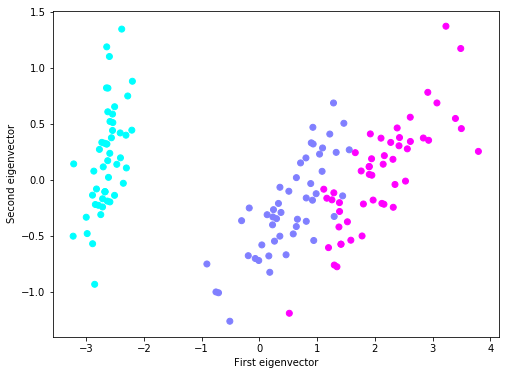

In [39]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=labelPred, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()